In [4]:
import random
import h5py
import numpy as np
import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [5]:
two = h5py.File('output_digi_HDF_2Body.h5', 'r')
three = h5py.File('output_digi_HDF_3Body.h5', 'r')
#print(two["Event_[111]"][:][:])

In [6]:
sample_size = 50
len2 = len(list(two.keys()))
len3 = len(list(three.keys()))

In [17]:
file_name = 'AllEvents_size' + str(sample_size) + '.h5'
new = h5py.File(file_name, 'a')
for n in tqdm.tqdm(range(len2)):
    name = 'Event_[' + str(n) + ']'
    event2 = two[name]
    event3 = three[name]
    length2 = len(event2)
    length3 = len(event3)
    event_data2 = np.zeros((length2, 6), float)
    event_data3 = np.zeros((length3, 6), float)
    #converting event into an array
    for i,e in enumerate(event2):
        instant = np.array(list(e))
        event_data2[i] = np.array(instant)
    for i,e in enumerate(event3):
        instant = np.array(list(e))
        event_data3[i] = np.array(instant)
    
    new_event2 = np.zeros((sample_size, 6), float)
    new_event3 = np.zeros((sample_size, 6), float)
    new_name2 = name + '.2'
    new_name3 = name + '.3'
    #making new array for normalized event
    if length2 == sample_size:
        new_event2 = event_data2
    else:        #length2 != sample_size:
        if length2 != 0:
            for i in range(sample_size):
                row = random.randint(0, length2 - 1)
                new_event2[i,:5] = event_data2[row,:5]
                if n%2 == 0:
                    new_event2[i,5] = 0
                else:
                    new_event2[i,5] = 1
        else:
            continue
        
    if length3 == sample_size:
        new_event3 = event_data3
    else:        #length3 != sample_size
        if length3 != 0:
            for i in range(sample_size):
                row = random.randint(0, length3 - 1)
                new_event3[i,:5] = event_data3[row,:5]
                if n%2 == 0:
                    new_event3[i,5] = 0
                else:
                    new_event3[i,5] = 2
        else:
            continue
    
    new.create_dataset(new_name2, data = new_event2)
    new.create_dataset(new_name3, data = new_event3)

100%|██████████| 10000/10000 [04:32<00:00, 36.66it/s]


In [18]:
print(len(list(new.keys())))
print(new['Event_[227].3'][:][:])

19890
[[-7.36235275e+01  8.78130341e+01  8.84000000e+02  4.42000000e+02
   1.93813808e+00  2.00000000e+00]
 [ 1.15343536e+02  1.55518732e+01  9.24000000e+02  4.62000000e+02
   2.75779660e+00  2.00000000e+00]
 [ 1.07981186e+02  1.13012161e+01  9.22000000e+02  4.61000000e+02
   2.30067749e+00  2.00000000e+00]
 [-4.90823593e+01 -9.63143463e+01  9.24000000e+02  4.62000000e+02
   1.62783724e+01  2.00000000e+00]
 [-2.69952984e+01  2.69546928e+01  9.16000000e+02  4.58000000e+02
   2.60886667e+01  2.00000000e+00]
 [ 1.07981186e+02  1.13012161e+01  9.22000000e+02  4.61000000e+02
   2.30067749e+00  2.00000000e+00]
 [-2.94494133e+01 -5.38077850e+01  9.28000000e+02  4.64000000e+02
   3.57611828e+01  2.00000000e+00]
 [-5.88988304e+01  6.52106018e+01  8.96000000e+02  4.48000000e+02
   1.32283710e+00  2.00000000e+00]
 [ 5.15364685e+01  7.05056143e+00  9.28000000e+02  4.64000000e+02
   1.89736237e+00  2.00000000e+00]
 [-8.83482437e+01  1.07717171e+02  8.76000000e+02  4.38000000e+02
   1.09125845e+00  

In [19]:
print(new['Event_[227].2'].shape)
print(new['Event_[227].3'].shape)

(50, 6)
(50, 6)


In [7]:
#setting aside a test set from the all events dataset
name = 'AllEvents_size' + str(sample_size)
whole = h5py.File(name + '.h5','r')
test = h5py.File(name + '_test.h5', 'a')
rest = h5py.File(name + '_rest.h5', 'a')
keys = list(whole.keys())
length = len(keys)
test_len = int(0.2*length)
test_set_indices = np.random.choice(range(length), test_len, replace=False)
for i in tqdm.tqdm(range(length)):
    event = whole[keys[i]]
    if np.isin(i, test_set_indices, assume_unique=True):
        test.create_dataset(keys[i], data = event)
    else:
        rest.create_dataset(keys[i], data = event)

100%|██████████| 19890/19890 [00:15<00:00, 1282.27it/s]


In [8]:
#splits remaining events data into training and validation sets
name = 'AllEvents_size' + str(sample_size)
whole = h5py.File(name + '_rest.h5','r')
train = h5py.File(name + '_train.h5', 'a')
val = h5py.File(name + '_val.h5', 'a')
keys = list(whole.keys())
length = len(keys)
val_len = int(0.25*length)     #20% of 80%
val_set_indices = np.random.choice(range(length), val_len, replace=False)
for i in tqdm.tqdm(range(length)):
    event = whole[keys[i]]
    if np.isin(i, val_set_indices, assume_unique=True):
        val.create_dataset(keys[i], data = event)
    else:
        train.create_dataset(keys[i], data = event)

100%|██████████| 15912/15912 [00:12<00:00, 1247.62it/s]


In [37]:
print(val_len, len(list(val.keys())))
print(length - val_len, len(list(train.keys())))

4000 4000
16000 16000


In [10]:
#run this if you haven't run the cells above
new = h5py.File('AllEvents_size50.h5','r')

In [63]:
def get_change(set_name, sample_size, event):
    if str(set_name) == 'two':
        if len(two[str(event)]) > sample_size:
            return 'Downsampled'
        elif len(two[str(event)]) < sample_size:
            return 'Upsampled'
        else:
            return ''
    else:
        if len(three[str(event)]) > sample_size:
            return 'Downsampled'
        elif len(three[str(event)]) < sample_size:
            return 'Upsampled'
        else:
            return ''

36 vs. 50 points


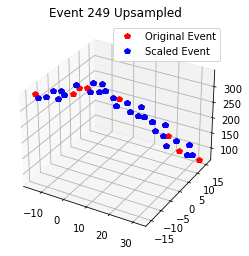

In [68]:
event = 249
name = 'Event_[' + str(event) + ']'
new_name = name + '.2'
print(str(len(two[name])) + ' vs. ' + str(sample_size) + ' points')

ax = plt.axes(projection='3d')
#plotting original event
event = two[name]
evt_data = np.zeros((len(event[:]),6))
for i,e in enumerate(event):
    instant = np.array(list(e))
    evt_data[i] = np.array(instant)
x = evt_data[:,0]
y = evt_data[:,1]
z = evt_data[:,2]
ax.plot3D(x,y,z,"rp", label='Original Event')

#plotting normalized event
event = new2[name]
evt_data = np.zeros((sample_size,6))
for i,e in enumerate(event):
    instant = np.array(list(e))
    evt_data[i] = np.array(instant)
x = evt_data[:,0]
y = evt_data[:,1]
z = evt_data[:,2]
ax.plot3D(x,y,z,"bp", label='Scaled Event')
plt.title(name[:5] + ' ' + name[7:-1] + ' ' + get_change('two', sample_size, name))
ax.legend()
plt.show() 